In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data=pd.read_csv("pizza_v2.csv")

In [3]:
data.head(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
5,A,"Rp140,000",18.5 inch,black_papper,american_favorite,jumbo,no,no,yes
6,A,"Rp110,000",16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes
7,A,"Rp70,000",8 inch,papperoni,american_favorite,reguler,no,no,yes
8,A,"Rp90,000",12 inch,mushrooms,american_favorite,reguler,yes,no,yes
9,A,"Rp90,000",12 inch,smoked_beef,american_favorite,reguler,no,no,no


In [4]:
data=data.drop('company',axis=1)

In [5]:
data.head(10)

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
5,"Rp140,000",18.5 inch,black_papper,american_favorite,jumbo,no,no,yes
6,"Rp110,000",16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes
7,"Rp70,000",8 inch,papperoni,american_favorite,reguler,no,no,yes
8,"Rp90,000",12 inch,mushrooms,american_favorite,reguler,yes,no,yes
9,"Rp90,000",12 inch,smoked_beef,american_favorite,reguler,no,no,no


array([[<AxesSubplot:title={'center':'price_rupiah'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'extra_sauce'}>,
        <AxesSubplot:title={'center':'extra_cheese'}>,
        <AxesSubplot:title={'center':'extra_mushrooms'}>],
       [<AxesSubplot:title={'center':'beef'}>,
        <AxesSubplot:title={'center':'black_papper'}>,
        <AxesSubplot:title={'center':'chicken'}>,
        <AxesSubplot:title={'center':'meat'}>,
        <AxesSubplot:title={'center':'mozzarella'}>,
        <AxesSubplot:title={'center':'mushrooms'}>],
       [<AxesSubplot:title={'center':'onion'}>,
        <AxesSubplot:title={'center':'papperoni'}>,
        <AxesSubplot:title={'center':'sausage'}>,
        <AxesSubplot:title={'center':'smoked_beef'}>,
        <AxesSubplot:title={'center':'tuna'}>,
        <AxesSubplot:title={'center':'vegetables'}>],
       [<AxesSubplot:title={'center':'BBQ_meat_fiesta'}>,
        <Ax

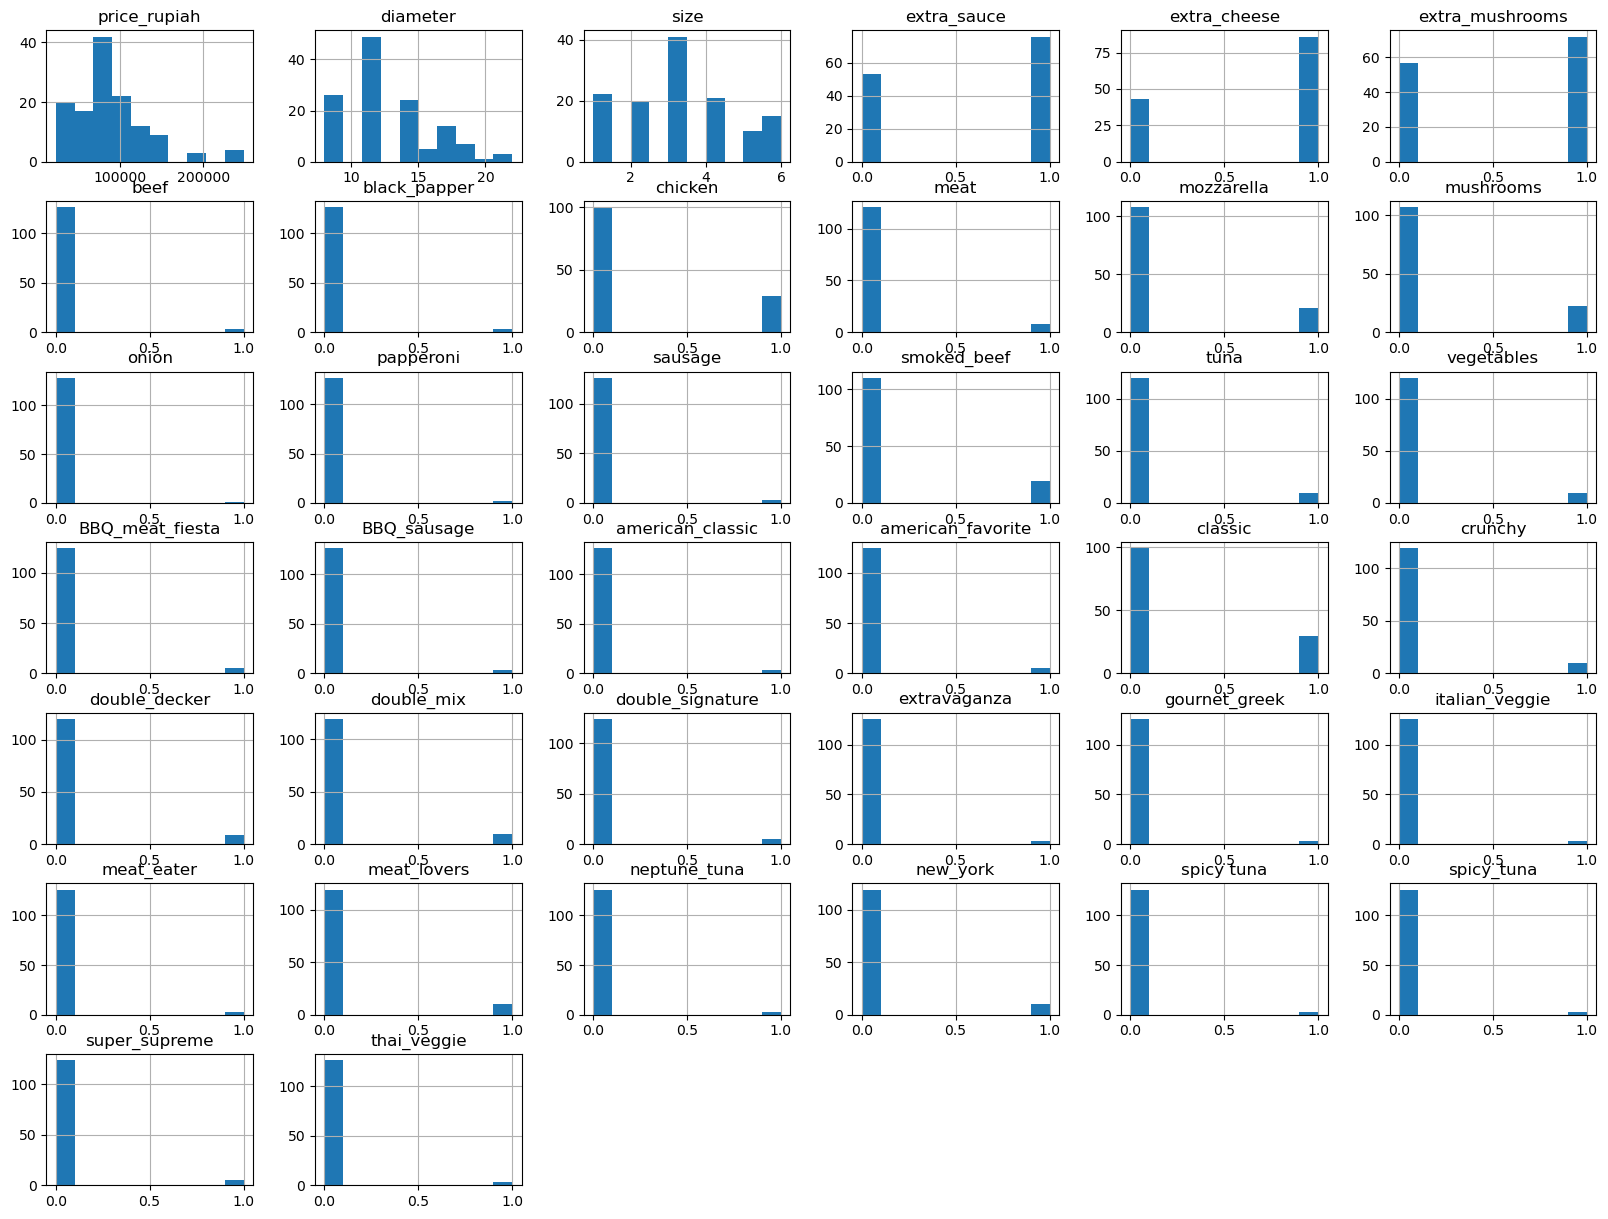

In [44]:
data.hist(bins=10,figsize=(20,15))

In [6]:
data.isnull().sum()

price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [7]:
data.describe()

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129
unique,43,12,12,20,6,2,2,2
top,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,11,49,29,30,41,76,86,72


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price_rupiah     129 non-null    object
 1   diameter         129 non-null    object
 2   topping          129 non-null    object
 3   variant          129 non-null    object
 4   size             129 non-null    object
 5   extra_sauce      129 non-null    object
 6   extra_cheese     129 non-null    object
 7   extra_mushrooms  129 non-null    object
dtypes: object(8)
memory usage: 8.2+ KB


In [10]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

In [11]:
data.replace({"size":{"small":1,"reguler":2,"medium":3,"large":4,"XL":5,"jumbo":6}},inplace=True)

In [12]:
data.head(10)

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,"Rp235,000",22 inch,chicken,double_signature,6,yes,yes,no
1,"Rp198,000",20 inch,papperoni,double_signature,6,yes,yes,no
2,"Rp120,000",16 inch,mushrooms,double_signature,2,yes,yes,yes
3,"Rp155,000",14 inch,smoked_beef,double_signature,2,yes,no,yes
4,"Rp248,000",18 inch,mozzarella,double_signature,6,yes,no,yes
5,"Rp140,000",18.5 inch,black_papper,american_favorite,6,no,no,yes
6,"Rp110,000",16 inch,smoked_beef,american_favorite,6,no,yes,yes
7,"Rp70,000",8 inch,papperoni,american_favorite,2,no,no,yes
8,"Rp90,000",12 inch,mushrooms,american_favorite,2,yes,no,yes
9,"Rp90,000",12 inch,smoked_beef,american_favorite,2,no,no,no


In [13]:
data.replace({"extra_sauce":{"yes":1,"no":0}},inplace=True)

In [14]:
data.head(10)

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,"Rp235,000",22 inch,chicken,double_signature,6,1,yes,no
1,"Rp198,000",20 inch,papperoni,double_signature,6,1,yes,no
2,"Rp120,000",16 inch,mushrooms,double_signature,2,1,yes,yes
3,"Rp155,000",14 inch,smoked_beef,double_signature,2,1,no,yes
4,"Rp248,000",18 inch,mozzarella,double_signature,6,1,no,yes
5,"Rp140,000",18.5 inch,black_papper,american_favorite,6,0,no,yes
6,"Rp110,000",16 inch,smoked_beef,american_favorite,6,0,yes,yes
7,"Rp70,000",8 inch,papperoni,american_favorite,2,0,no,yes
8,"Rp90,000",12 inch,mushrooms,american_favorite,2,1,no,yes
9,"Rp90,000",12 inch,smoked_beef,american_favorite,2,0,no,no


In [15]:
data.replace({"extra_cheese":{"yes":1,"no":0}},inplace=True)

In [16]:
data.replace({"extra_mushrooms":{"yes":1,"no":0}},inplace=True)

In [17]:
data.tail(5)

,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,"Rp39,000",8.5 inch,tuna,spicy tuna,1,1,1,1
125,"Rp72,000",12 inch,tuna,spicy tuna,3,1,1,1
126,"Rp99,000",14 inch,tuna,spicy tuna,4,1,1,1
127,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,1,1,0,1
128,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,3,0,0,1


In [18]:
data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

In [19]:
data=data.join(pd.get_dummies(data['topping']))

In [20]:
data=data.drop('topping',axis=1)

In [21]:
data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

In [22]:
data=data.join(pd.get_dummies(data['variant']))

In [23]:
data=data.drop('variant',axis=1)

In [24]:
data.head(5)

,price_rupiah,diameter,size,extra_sauce,extra_cheese,extra_mushrooms,beef,black_papper,chicken,meat,...,gournet_greek,italian_veggie,meat_eater,meat_lovers,neptune_tuna,new_york,spicy tuna,spicy_tuna,super_supreme,thai_veggie
0,"Rp235,000",22 inch,6,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rp198,000",20 inch,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rp120,000",16 inch,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Rp155,000",14 inch,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Rp248,000",18 inch,6,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price_rupiah       129 non-null    object
 1   diameter           129 non-null    object
 2   size               129 non-null    int64 
 3   extra_sauce        129 non-null    int64 
 4   extra_cheese       129 non-null    int64 
 5   extra_mushrooms    129 non-null    int64 
 6   beef               129 non-null    uint8 
 7   black_papper       129 non-null    uint8 
 8   chicken            129 non-null    uint8 
 9   meat               129 non-null    uint8 
 10  mozzarella         129 non-null    uint8 
 11  mushrooms          129 non-null    uint8 
 12  onion              129 non-null    uint8 
 13  papperoni          129 non-null    uint8 
 14  sausage            129 non-null    uint8 
 15  smoked_beef        129 non-null    uint8 
 16  tuna               129 non-null    uint8 
 1

In [26]:
data['price_rupiah']=data['price_rupiah'].str.replace("Rp","")
data['price_rupiah']=data['price_rupiah'].str.replace(",","").astype('int32')

In [27]:
data.head(5)

,price_rupiah,diameter,size,extra_sauce,extra_cheese,extra_mushrooms,beef,black_papper,chicken,meat,...,gournet_greek,italian_veggie,meat_eater,meat_lovers,neptune_tuna,new_york,spicy tuna,spicy_tuna,super_supreme,thai_veggie
0,235000,22 inch,6,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,198000,20 inch,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120000,16 inch,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155000,14 inch,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,248000,18 inch,6,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data['diameter']=data['diameter'].str.replace("inch","")
data['diameter']=data['diameter'].str.replace(",","").astype('float32')

In [29]:
data.head(5)

,price_rupiah,diameter,size,extra_sauce,extra_cheese,extra_mushrooms,beef,black_papper,chicken,meat,...,gournet_greek,italian_veggie,meat_eater,meat_lovers,neptune_tuna,new_york,spicy tuna,spicy_tuna,super_supreme,thai_veggie
0,235000,22.0,6,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,198000,20.0,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120000,16.0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155000,14.0,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,248000,18.0,6,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


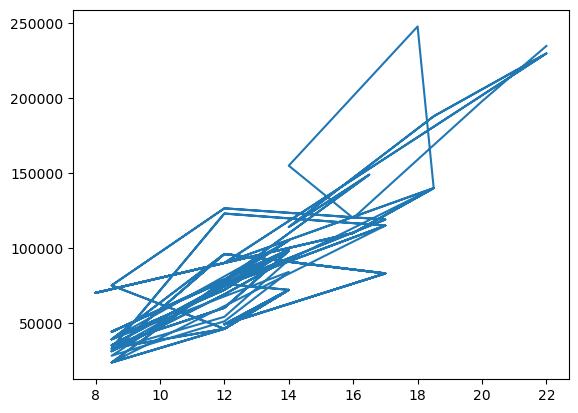

Text(0.5, 1.0, 'size vs price')

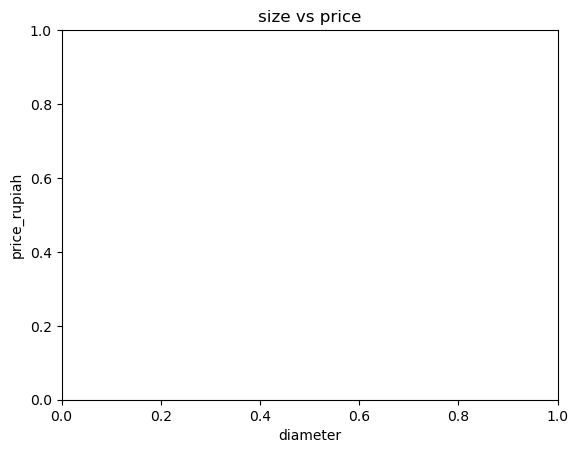

In [41]:
plt.plot(data['diameter'],data['price_rupiah'])
plt.show()
plt.xlabel("diameter")
plt.ylabel("price_rupiah")
plt.title("size vs price")

<AxesSubplot:xlabel='size', ylabel='price_rupiah'>

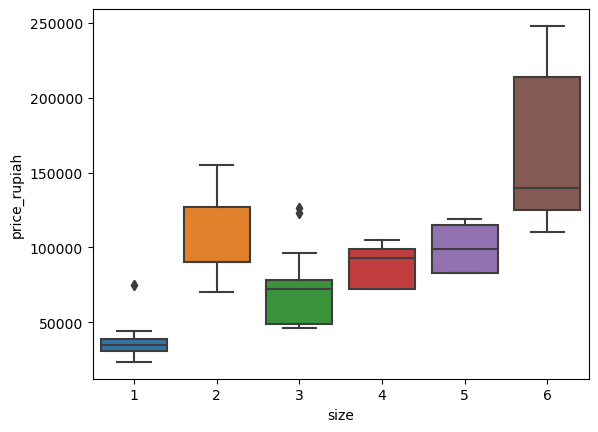

In [42]:
sns.boxplot(x='size',y='price_rupiah',data=data)

In [ ]:
sns.countplot()

In [30]:
rf=RandomForestRegressor()

In [31]:
x=data.drop('price_rupiah',axis=1)
y=data['price_rupiah']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape

(103, 37)

In [34]:
y_train.shape

(103,)

In [35]:
x_test.shape

(26, 37)

In [36]:
y_test.shape

(26,)

In [37]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
data_predict=rf.predict(x_test)

In [39]:
print("the accuracy of data_predict",r2_score(data_predict,y_test))

the accuracy of data_predict 0.8876043604066832


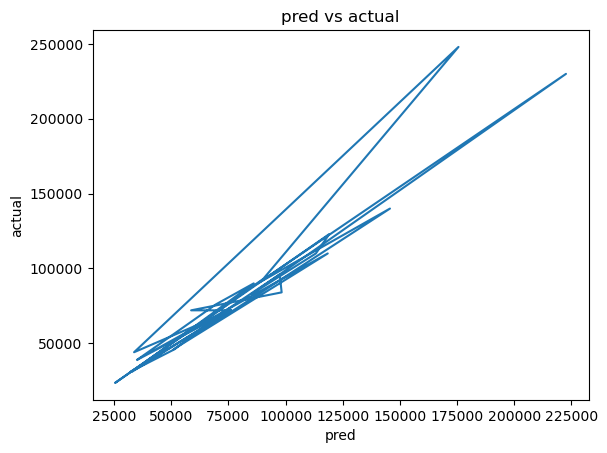

In [40]:
plt.plot(data_predict,y_test)
plt.title("pred vs actual")
plt.xlabel("pred")
plt.ylabel("actual")
plt.show()

In [ ]:
input_data=[]
input_data_array=np.asarray(input_data)
input_data_array_reshape=input_data_array.reshape(1,-1)
input_predict=rf.predict(input_data_array_reshape)
print(input_predict)